<h2> <font color='blue'> Day 2 afternoon Challenge

<h3><font color=blue> The goal today is to compare seasonal timeseries of the lidar 18m wind data. A suggestion of steps are shown below, but this code can be written many different ways (and much more effieiciently than suggested below) If you have an idea of how to procede, ignore the comments! The comments should be used if you have no idea where to get started.<br/><br/>Ultimately the end goal is to have: 
    <br/> 1. a plot or plots that compares seasonal data from each month in 2020. The timesteps should be daily averaged windspeed.
    <font color='red'><br/> 2. accomplished using only one big loop (can have nested loops inside)
    <br/> <font color='blue'>3. a written description comparing the seasonal wind trends
    <br/> <font color='red'>4. The same comparison as 1 but this time using both 2019 and 2020 dates to calculate the daily averaged windspeed.
    

<h1><font color='blue'> 1. 

In [1]:
#load in libraries you might need here

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import numpy as np
from numpy import savetxt
import xarray as xr
import os
import scipy
import pandas as pd
import matplotlib.colors
from matplotlib import cm
import netCDF4
from netCDF4 import Dataset

In [2]:
#load in the exact same wind_array data we used in the morning session
lidar_winds=pd.read_csv('lidar_winds_short.csv')
time=np.asarray(lidar_winds['timestamp'])
wind18m=np.asarray(lidar_winds['wspd18m'])
wind_array=np.array([time,wind18m])

In [3]:
lidar_winds

,timestamp,wspd18m
0,08-12-2019 00:00,7.2923
1,08-12-2019 00:10,7.8613
2,08-12-2019 00:20,7.7594
3,08-12-2019 00:30,7.4891
4,08-12-2019 00:40,7.8829
...,...,...
84391,03-21-2021 23:10,1.7978
84392,03-21-2021 23:20,2.6771
84393,03-21-2021 23:30,3.2416
84394,03-21-2021 23:40,2.7582


In [3]:
# Split the dataframe to date and time
lidar_winds[['date','time']] = lidar_winds.timestamp.str.split(expand = True) 

In [4]:
# Split date for the months 
lidar_winds[['month','day','year']] = lidar_winds.date.str.split('-',expand = True) 

In [5]:
lidar_winds

,timestamp,wspd18m,date,time,month,day,year
0,08-12-2019 00:00,7.2923,08-12-2019,00:00,08,12,2019
1,08-12-2019 00:10,7.8613,08-12-2019,00:10,08,12,2019
2,08-12-2019 00:20,7.7594,08-12-2019,00:20,08,12,2019
3,08-12-2019 00:30,7.4891,08-12-2019,00:30,08,12,2019
4,08-12-2019 00:40,7.8829,08-12-2019,00:40,08,12,2019
...,...,...,...,...,...,...,...
84391,03-21-2021 23:10,1.7978,03-21-2021,23:10,03,21,2021
84392,03-21-2021 23:20,2.6771,03-21-2021,23:20,03,21,2021
84393,03-21-2021 23:30,3.2416,03-21-2021,23:30,03,21,2021
84394,03-21-2021 23:40,2.7582,03-21-2021,23:40,03,21,2021


In [6]:
# Create 2020 Dataset
lidar_winds_2020 = lidar_winds[lidar_winds['year'] == '2020']

In [7]:
lidar_winds_2020

,timestamp,wspd18m,date,time,month,day,year
20448,01-01-2020 00:00,10.8461,01-01-2020,00:00,01,01,2020
20449,01-01-2020 00:10,11.0281,01-01-2020,00:10,01,01,2020
20450,01-01-2020 00:20,11.0447,01-01-2020,00:20,01,01,2020
20451,01-01-2020 00:30,11.5979,01-01-2020,00:30,01,01,2020
20452,01-01-2020 00:40,10.8034,01-01-2020,00:40,01,01,2020
...,...,...,...,...,...,...,...
72871,12-31-2020 23:10,9.5358,12-31-2020,23:10,12,31,2020
72872,12-31-2020 23:20,10.0370,12-31-2020,23:20,12,31,2020
72873,12-31-2020 23:30,9.2183,12-31-2020,23:30,12,31,2020
72874,12-31-2020 23:40,9.2708,12-31-2020,23:40,12,31,2020


In [8]:
#Using pandas functions to create seasons 
##Seasons here can be considered 
##Summer:June,July,Aug; Fall:Sept,Oct,Nov; Winter:Dec,Jan,Feb; Spring:March,Apr,May

summer_2020 = lidar_winds_2020[(lidar_winds_2020['month'] == '06') | (lidar_winds_2020['month'] == '07') | (lidar_winds_2020['month'] == '08')]
fall_2020 = lidar_winds_2020[(lidar_winds_2020['month'] == '09') | (lidar_winds_2020['month'] == '10') | (lidar_winds_2020['month'] == '11')]
winter_2020 = lidar_winds_2020[(lidar_winds_2020['month'] == '12') | (lidar_winds_2020['month'] == '01') | (lidar_winds_2020['month'] == '02')]
spring_2020 = lidar_winds_2020[(lidar_winds_2020['month'] == '03') | (lidar_winds_2020['month'] == '04') | (lidar_winds_2020['month'] == '05')]

summer_2020 = summer_2020.copy()
fall_2020 = fall_2020.copy()
winter_2020 = winter_2020.copy()
spring_2020 = spring_2020.copy()

In [13]:
summer_2020 = summer_2020.set_index(0,:)

SyntaxError: invalid syntax (<ipython-input-13-5856df71769e>, line 1)

In [15]:
# 
summer_2020['timestamp'] = pd.to_datetime(summer_2020['timestamp'])
fall_2020['timestamp'] = pd.to_datetime(fall_2020['timestamp'])
winter_2020['timestamp'] = pd.to_datetime(winter_2020['timestamp'])
spring_2020['timestamp'] = pd.to_datetime(spring_2020['timestamp'])

In [19]:
# Set timestamp as index 
summer_2020 = summer_2020.set_index('timestamp')
fall_2020 = fall_2020.set_index('timestamp')
spring_2020 = spring_2020.set_index('timestamp')
winter_2020 = winter_2020.set_index('timestamp')


In [20]:
summer_2020

,wspd18m,date,time,month,year
timestamp,,,,,
2020-06-01 00:00:00,1.8868,06-01-2020,00:00,06,2020
2020-06-01 00:10:00,2.1460,06-01-2020,00:10,06,2020
2020-06-01 00:20:00,2.6629,06-01-2020,00:20,06,2020
2020-06-01 00:30:00,3.4162,06-01-2020,00:30,06,2020
2020-06-01 00:40:00,3.6416,06-01-2020,00:40,06,2020
...,...,...,...,...,...
2020-08-31 23:10:00,6.9413,08-31-2020,23:10,08,2020
2020-08-31 23:20:00,6.5449,08-31-2020,23:20,08,2020
2020-08-31 23:30:00,6.8403,08-31-2020,23:30,08,2020


In [21]:
#Take the average daily windspeed for each of the seasons

summer_avg = summer_2020['wspd18m'].resample("1D").mean()
fall_avg = fall_2020['wspd18m'].resample("1D").mean()
spring_avg = spring_2020['wspd18m'].resample("1D").mean()
winter_avg = winter_2020['wspd18m'].resample("1D").mean()

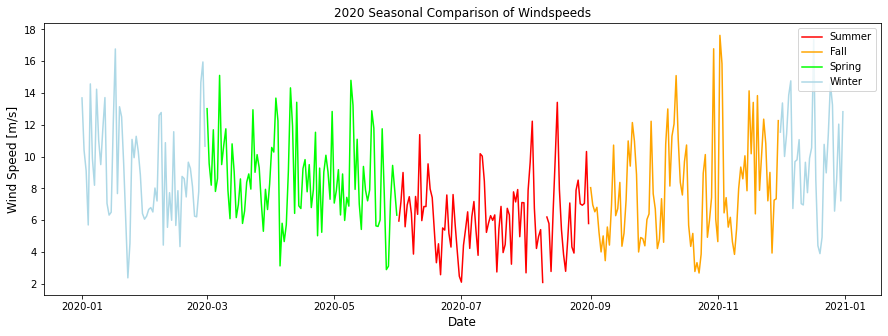

In [38]:
#Plot each of the four seasons as a timeseries on the same plot. 
##Use different colors and add a legend to make it beautiful!


fig, ax = plt.subplots(1, 1, figsize=(15,5))

ax.plot(summer_avg.index, summer_avg, color = 'red', label ='Summer')
ax.plot(fall_avg.index, fall_avg, color = 'orange', label ='Fall')
ax.plot(spring_avg.index, spring_avg, color = 'lime', label = 'Spring')
ax.plot(winter_avg.index, winter_avg, color = 'lightblue', label = 'Winter')

ax.set_ylabel("Wind Speed [m/s]", fontsize=12)
ax.set_xlabel("Date", fontsize=12)

plt.title("2020 Seasonal Comparison of Windspeeds")
plt.legend(loc = 'upper right')
plt.show()



<h1><font color='red'> 2. 

<h1><font color='blue'> 3. 

In [ ]:
#Write a few sentences of observations you see based on your seasonal winds.

<h1><font color='red'> 4. 